In [ ]:
import joblib

In [ ]:
f='/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/data_file1.joblib.bz2'
file = joblib.load(f)

In [ ]:
X_train = file['trainX']
Y_train = file["trainY"]

In [ ]:
X_train.shape

(78646, 2000)

In [ ]:
f='/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/data_file2.joblib.bz2'
file = joblib.load(f)

In [ ]:
X_test = file['testX']
Y_test = file['testY']
max_fatures = file["max_fatures"]
bias = file["bias"]

In [ ]:
del file
del f

In [ ]:
bias

0.07045204866338446

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
# model
embed_dim = 128
lstm_out = 256

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 128)         1024000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 2000, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 2)                 514       
Total params: 1,418,754
Trainable params: 1,418,754
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size = 128
# also adding weights
class_weights = {1: 0.54 ,
                0: 7.60 }
checkpoint_path = "/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/trained_weights/cp.ckpt"
#checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history = model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1, validation_data=(X_test, Y_test),class_weight=class_weights,callbacks=[cp_callback])

Epoch 1/15
615/615 [==============================] - 4645s 8s/step - loss: 0.8816 - accuracy: 0.5910 - val_loss: 0.8164 - val_accuracy: 0.6896

Epoch 00001: saving model to /content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/trained_weights/cp.ckpt
Epoch 2/15
615/615 [==============================] - 4474s 7s/step - loss: 0.3150 - accuracy: 0.8610 - val_loss: 0.8341 - val_accuracy: 0.7547

Epoch 00002: saving model to /content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/trained_weights/cp.ckpt
Epoch 3/15
615/615 [==============================] - 4485s 7s/step - loss: 0.2294 - accuracy: 0.9055 - val_loss: 0.8931 - val_accuracy: 0.7589

Epoch 00003: saving model to /content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/trained_weights/cp.ckpt
Epoch 4/15
615/615 [==============================] - 4478s 7s/step - loss: 0.2008 - accuracy: 0.9189 - val_loss: 0.7524 - val_accuracy: 0.7953

Epoch 00004: saving model to /

In [ ]:
from tensorflow.keras.models import load_model

model.load_weights("/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/trained_weights/cp.ckpt")

# evaluate loaded model on test data
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
score = model.evaluate(X_test, Y_test, verbose=1)


329/329 [==============================] - 161s 489ms/step - loss: 0.8352 - accuracy: 0.7980


In [ ]:
import matplotlib.pyplot as plt

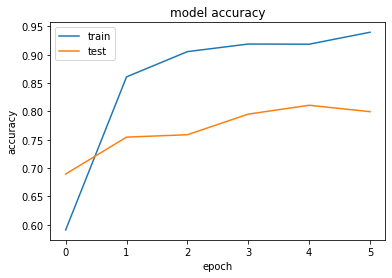

In [ ]:
# summarize history for accuracy

plt.plot([0.5910,0.8610,0.9055,0.9189,0.9186,0.9397])
plt.plot([0.6896,0.7547,0.7589,0.7953,0.8109,0.7996])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

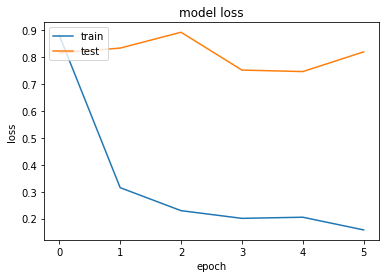

In [ ]:
# summarize history for loss
plt.plot([0.8816,0.3150,0.2294,0.2008,0.2050,0.1578])
plt.plot([0.8164,0.8341,0.8931,0.7524,0.7468,0.8201])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()